In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('supermarket_sales_clean.csv')

In [4]:
df.sample(10)

,city,time,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_income
520,mandalay,2019-03-15 10:50:00,health_and_beauty,92.78,1,4.6390,97.4190,credit card,normal,male,9.8,92.78,4.6390
381,mandalay,2019-01-24 17:37:00,electronic_accessories,40.30,10,20.1500,423.1500,credit card,member,male,7.0,403.00,20.1500
74,yangon,2019-01-27 18:05:00,fashion_accessories,54.28,7,18.9980,398.9580,ewallet,normal,female,9.3,379.96,18.9980
830,naypyitaw,2019-03-02 10:02:00,sports_and_travel,73.95,4,14.7900,310.5900,cash,normal,female,6.1,295.80,14.7900
610,mandalay,2019-07-02 15:06:00,electronic_accessories,57.91,8,23.1640,486.4440,cash,normal,female,8.1,463.28,23.1640
47,yangon,2019-01-21 18:00:00,food_and_beverages,54.67,3,8.2005,172.2105,credit card,normal,male,8.6,164.01,8.2005
657,mandalay,2019-11-03 19:44:00,electronic_accessories,34.49,5,8.6225,181.0725,credit card,member,female,9.0,172.45,8.6225
637,mandalay,2019-09-03 14:36:00,fashion_accessories,95.54,7,33.4390,702.2190,credit card,normal,male,9.6,668.78,33.4390
927,naypyitaw,2019-07-01 12:37:00,food_and_beverages,27.22,3,4.0830,85.7430,cash,normal,male,7.3,81.66,4.0830
143,yangon,2019-02-27 16:10:00,fashion_accessories,77.93,9,35.0685,736.4385,ewallet,normal,female,7.6,701.37,35.0685


In [5]:
df.dtypes

city              object
time              object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
payment           object
customer_type     object
gender            object
rating           float64
cogs             float64
gross_income     float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
df.select_dtypes(include=['object']).columns

Index(['city', 'product_line', 'payment', 'customer_type', 'gender'], dtype='object')

In [8]:
df.select_dtypes(include=[np.number]).columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'rating', 'cogs',
       'gross_income'],
      dtype='object')

## Plotting the Data

In [9]:
sns.set_theme(style='darkgrid',palette='magma',)

### Relational Plots

Scatter Plot

<Axes: xlabel='cogs', ylabel='rating'>

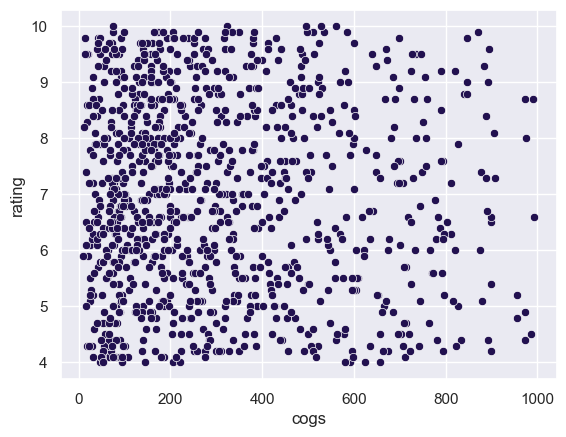

In [10]:
sns.scatterplot(data=df, x='cogs', y='rating')

Line Plot

<Axes: xlabel='time', ylabel='total'>

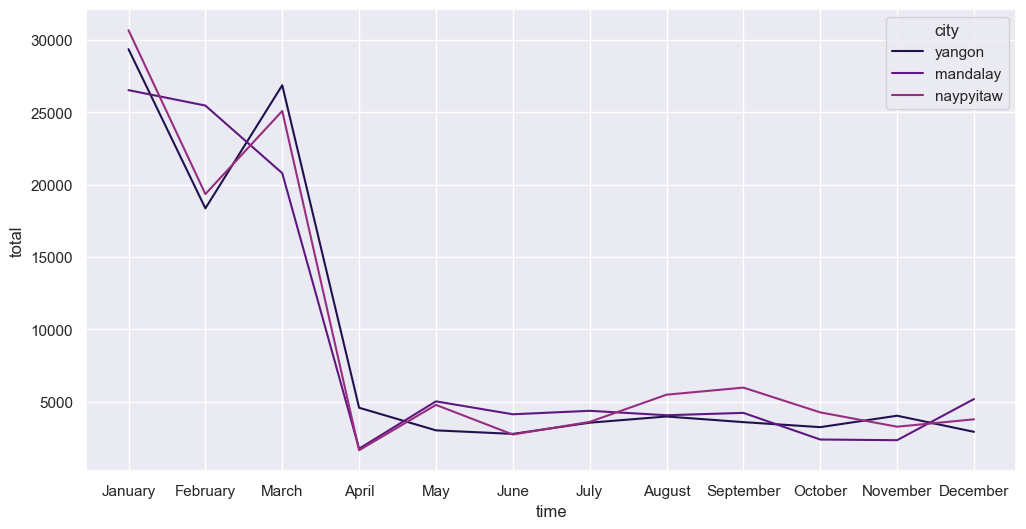

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['time'].dt.month_name(),y=df['total'],hue=df['city'],errorbar=None,estimator='sum')

Relational Plot

<Figure size 1200x600 with 0 Axes>

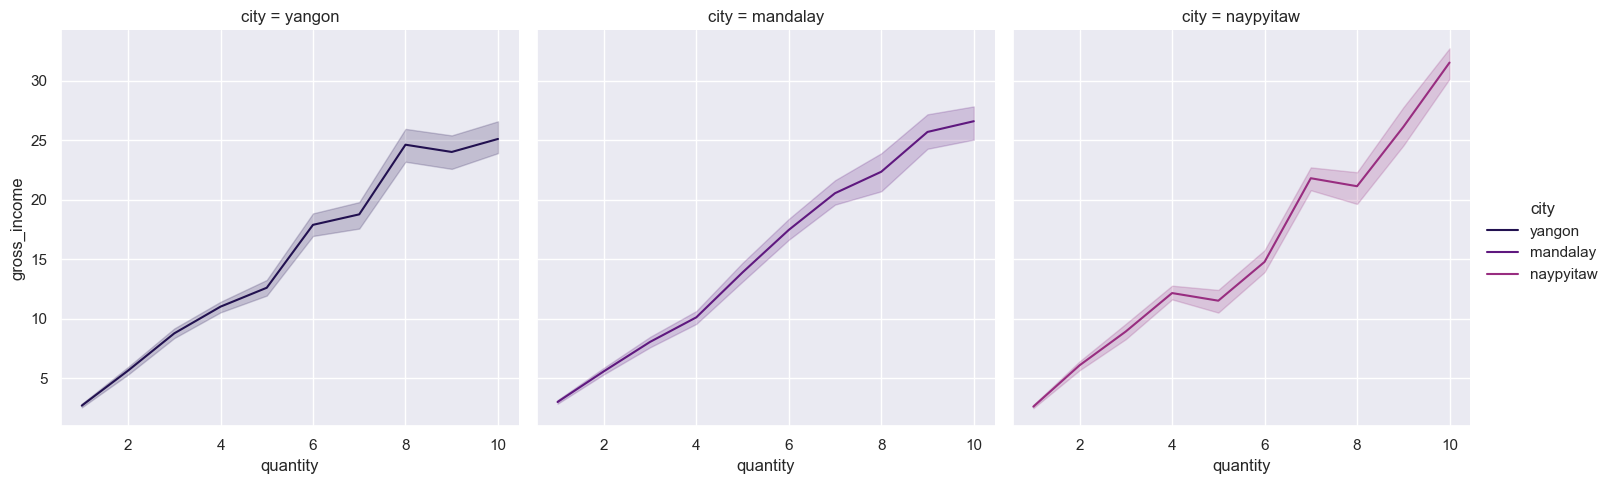

In [12]:
plt.figure(figsize=(12,6)) 
sns.relplot(data=df, x='quantity', y='gross_income',kind='line',hue='city',col='city',errorbar=('ci',50))

### Categorical Plots

Bar Plot

<Axes: xlabel='city', ylabel='gross_income'>

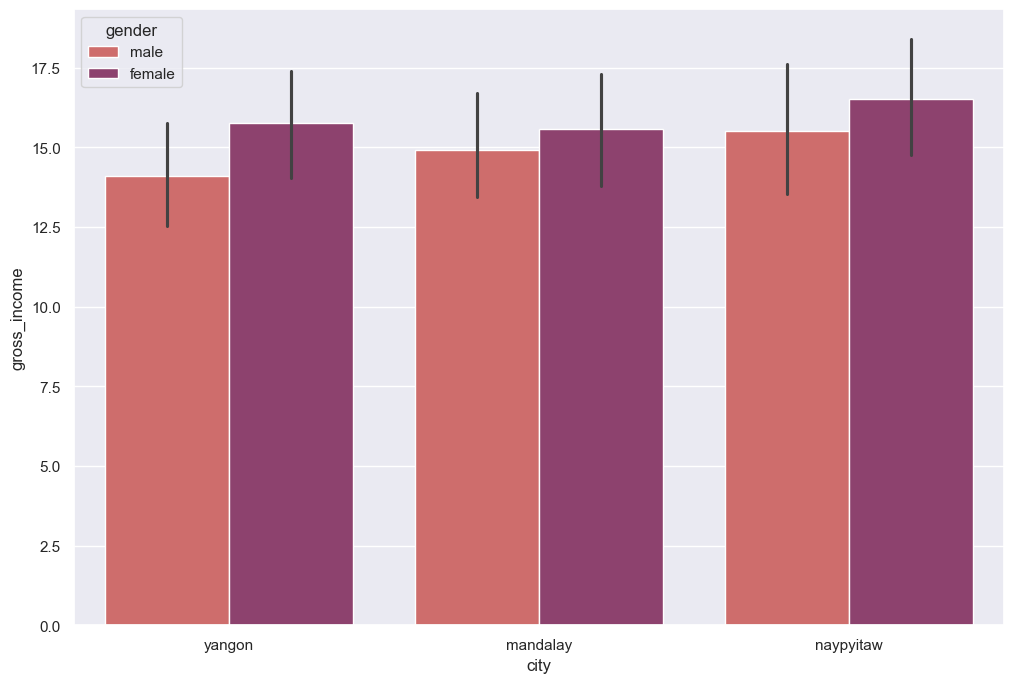

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='city', y='gross_income',hue='gender',estimator='mean',palette='flare')


Count Plot

In [14]:
df['product_line'].count()

np.int64(1000)

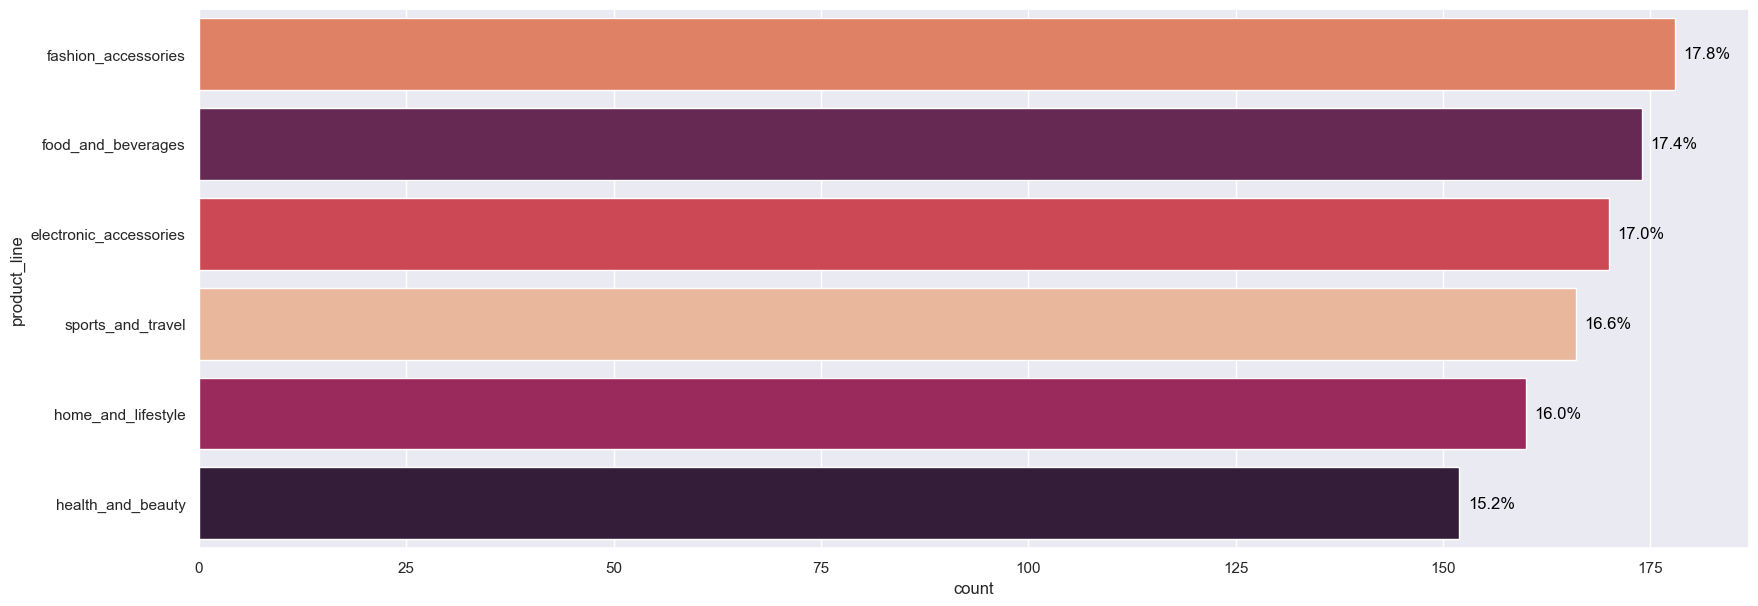

In [62]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,y='product_line',palette='rocket_r',order=df['product_line'].value_counts().index,hue='product_line')
for index, value in enumerate(df['product_line'].value_counts(normalize=True).sort_values(ascending=False)):
    plt.text( (value * 1000) + 1 , index , str(f'{value * 100}%'), ha= 'left', va = 'center' ,fontsize=12,color='black') 

Strip Plot

<Axes: xlabel='product_line', ylabel='gross_income'>

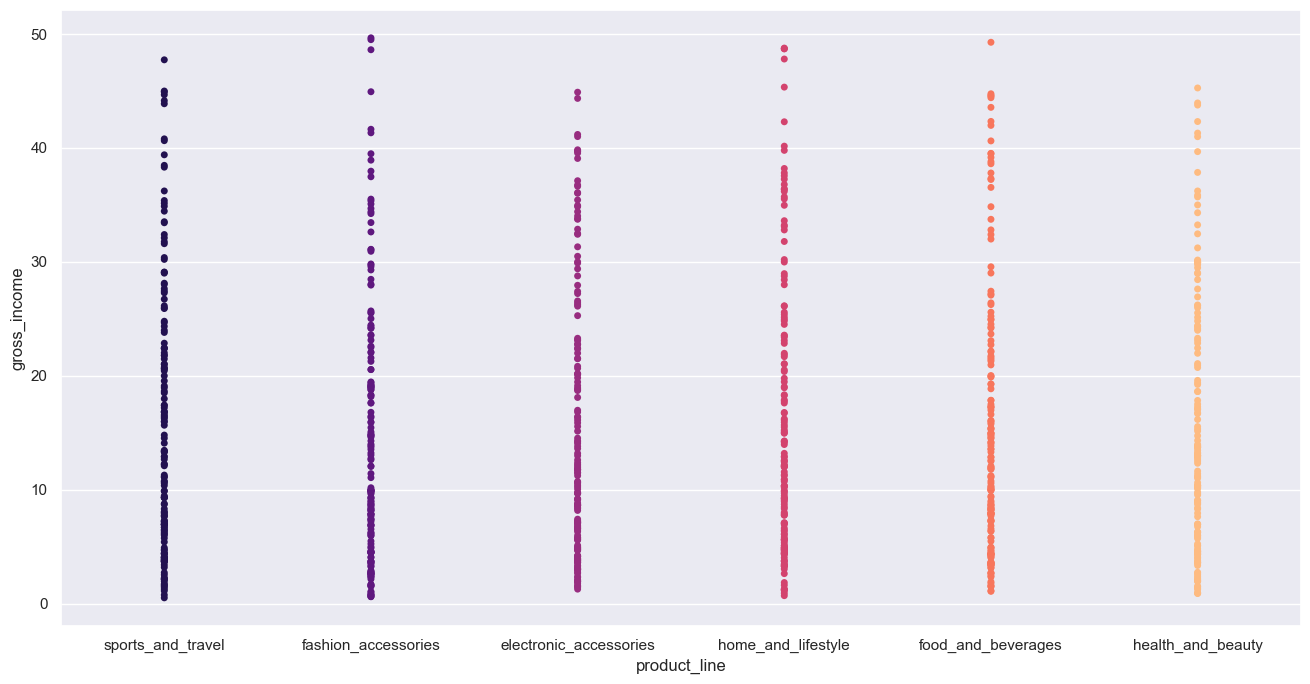

In [16]:
plt.figure(figsize=(16,8))
sns.stripplot(data=df,x='product_line', y='gross_income',hue='product_line',jitter=0)

Box Plot

<Axes: xlabel='product_line', ylabel='unit_price'>

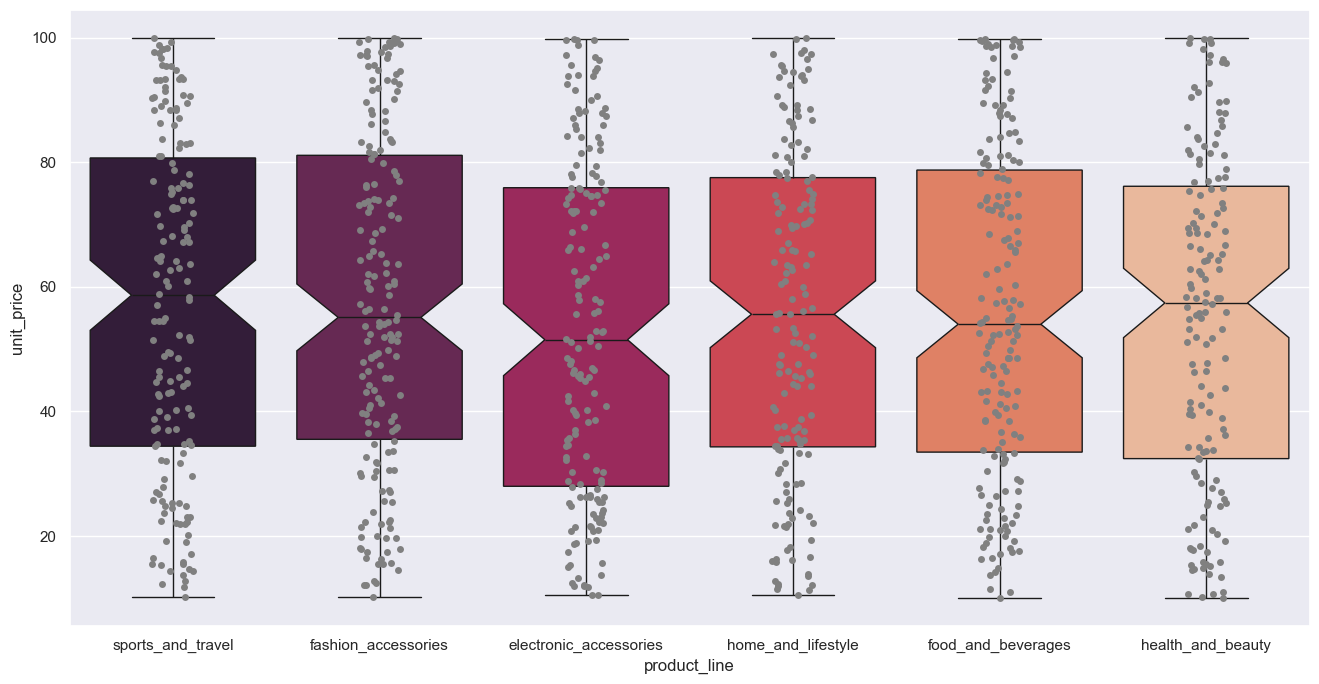

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,y='unit_price',hue='product_line',x="product_line",whis=1.5,notch=True,palette='rocket')
sns.stripplot(data=df,y='unit_price',x='product_line',jitter=True,color='0.5')

Swarm Plot

<Axes: xlabel='gender', ylabel='total'>

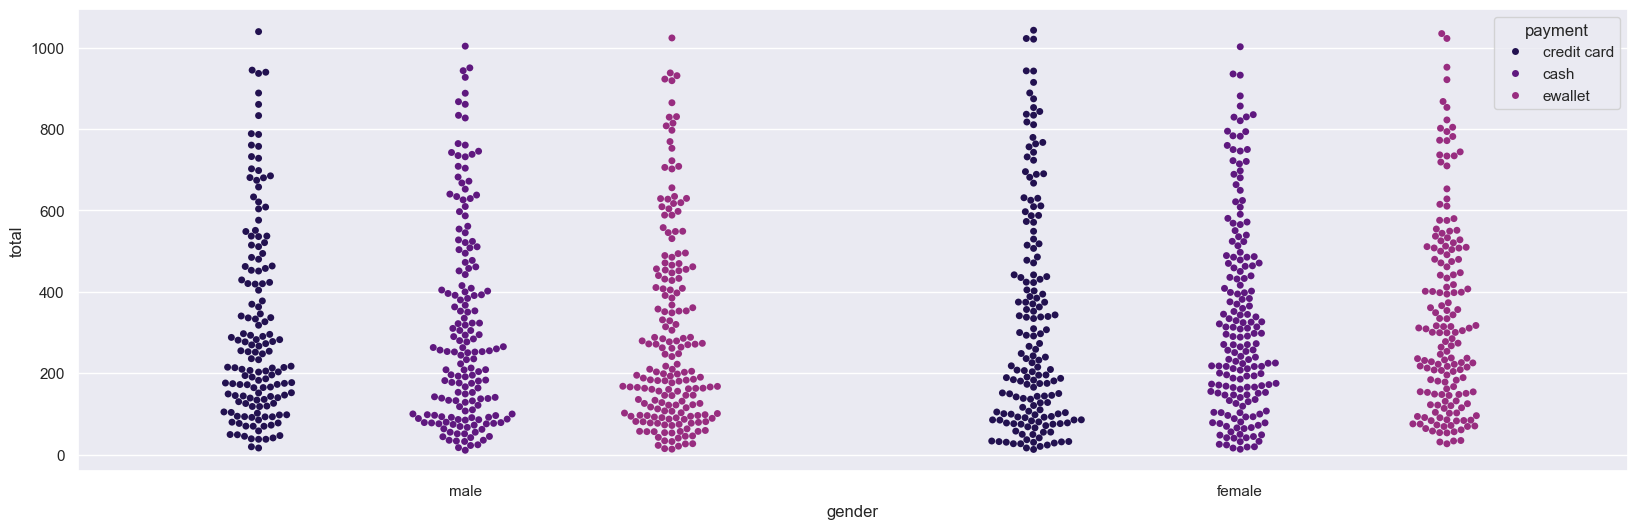

In [18]:
plt.figure(figsize=(20,6))
sns.swarmplot(hue=df['payment'],y=df['total'],x=df['gender'],dodge=True)

Joint Plot

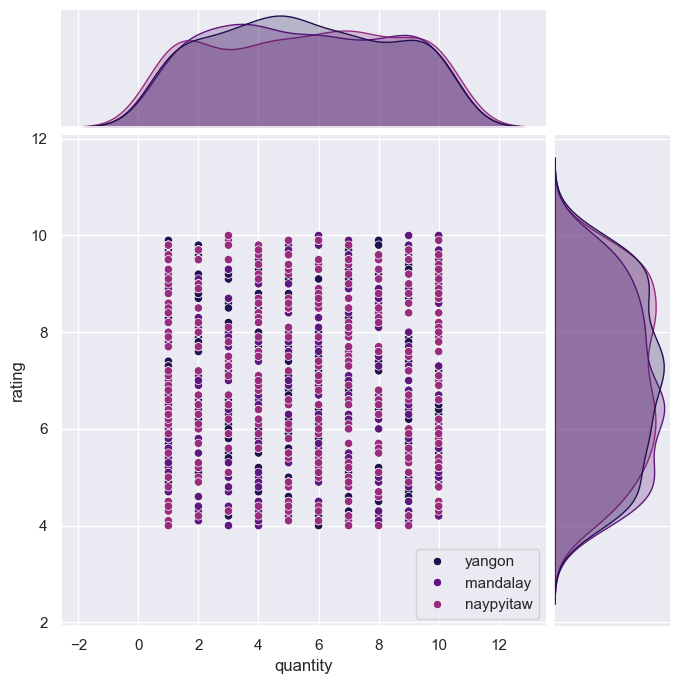

In [19]:
sns.jointplot(data=df, y='rating', x='quantity',kind='scatter',hue='city',height=7,ratio=4,space=0.07,)
plt.legend(loc='lower right')

Violin Plot

<Axes: xlabel='gross_income', ylabel='city'>

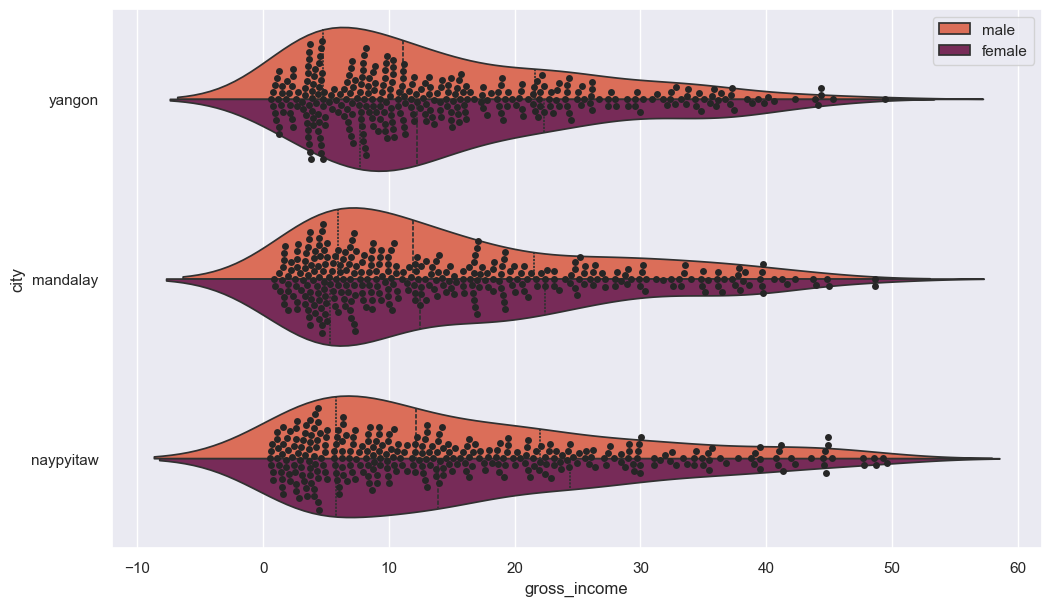

In [20]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df, y='city', x='gross_income',hue='gender',split=True,palette='rocket_r',inner='quarter')
sns.swarmplot(data=df, y='city', x='gross_income',color='0.15')

Facet Grid 

<Figure size 1200x700 with 0 Axes>

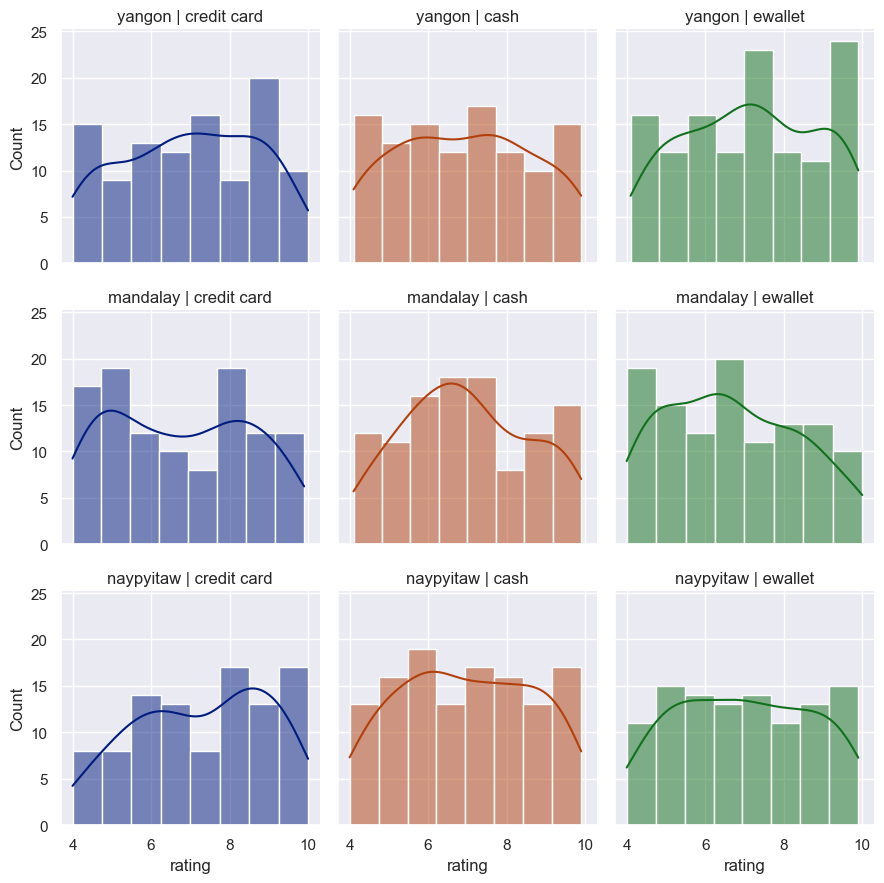

In [21]:
plt.figure(figsize=(12,7))
sns.FacetGrid(df,row='city',hue='payment',sharey=True,col='payment',palette='dark' ).map(sns.histplot,'rating',kde=True,).set_titles('{row_name} | {col_name}')

Cat Grid

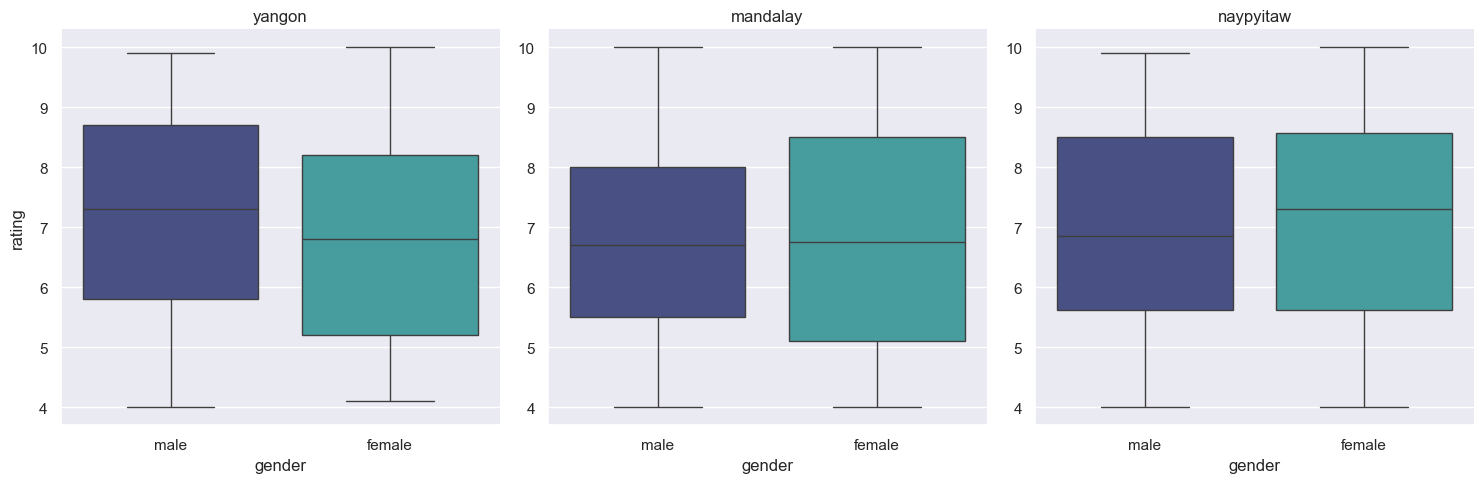

In [61]:
sns.catplot(data=df,y='rating',kind='box',x='gender',height=5,col='city',palette='mako',hue='gender',sharey=False,).set_titles('{col_name}')

### Relational Plots

Histogram

<Axes: xlabel='unit_price', ylabel='Count'>

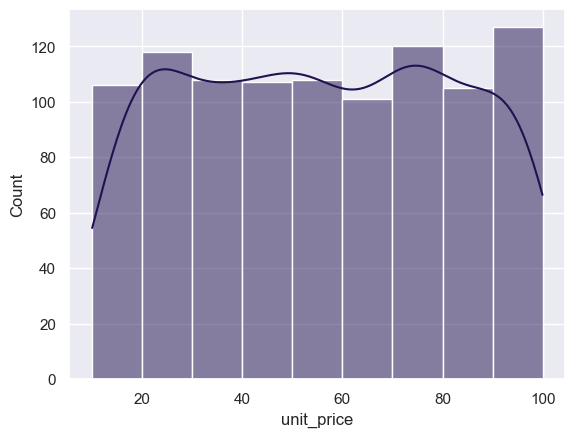

In [23]:
sns.histplot(data=df,x='unit_price',kde=True,binwidth=10,binrange=(10,100),stat='count',discrete=False)

<Axes: xlabel='unit_price', ylabel='Count'>

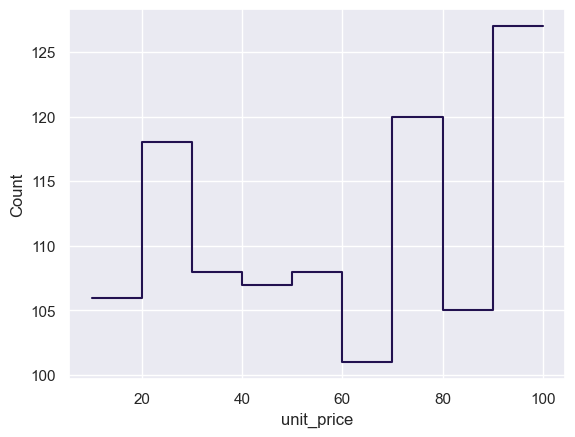

In [24]:
sns.histplot(data=df,x='unit_price',binwidth=10,binrange=(10,100),stat='count',discrete=False,element='step',fill=False)

<Axes: xlabel='unit_price', ylabel='Count'>

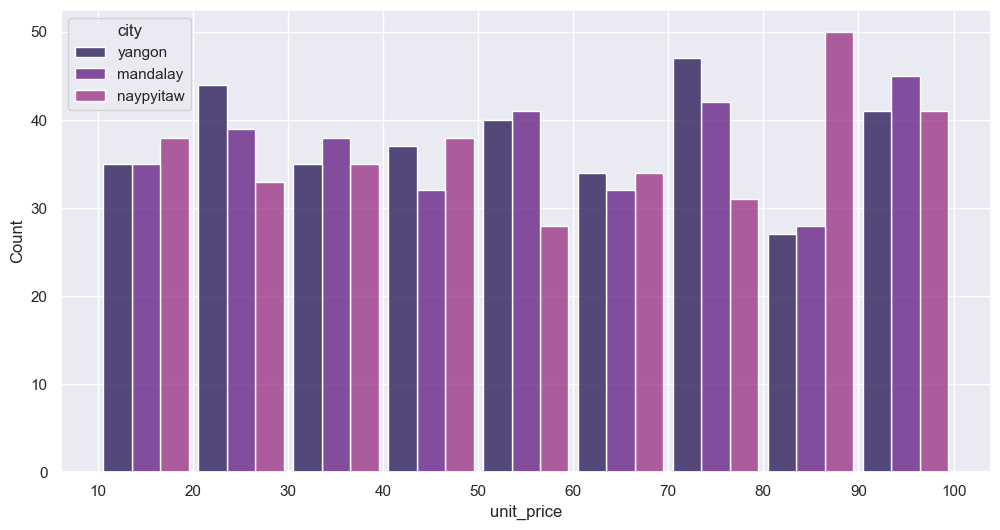

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(range(10,101,10))
sns.histplot(data=df,x='unit_price',binwidth=10,hue='city',multiple='dodge',shrink=0.9) 



<Axes: xlabel='gross_income', ylabel='rating'>

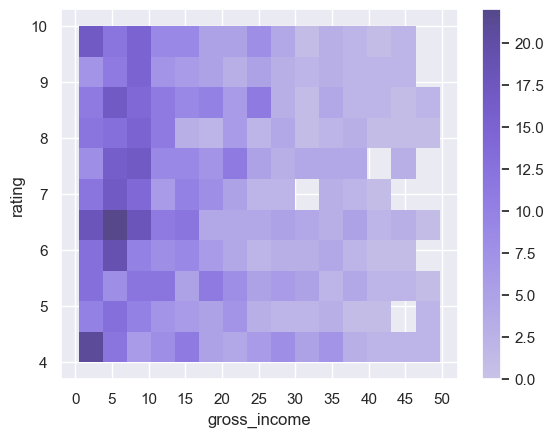

In [26]:
plt.xticks(range(0,101,5))
sns.histplot(data=df,x='gross_income',y='rating',cbar=True,stat='count') 

Kernal Density Estimation 

<Axes: xlabel='unit_price', ylabel='Density'>

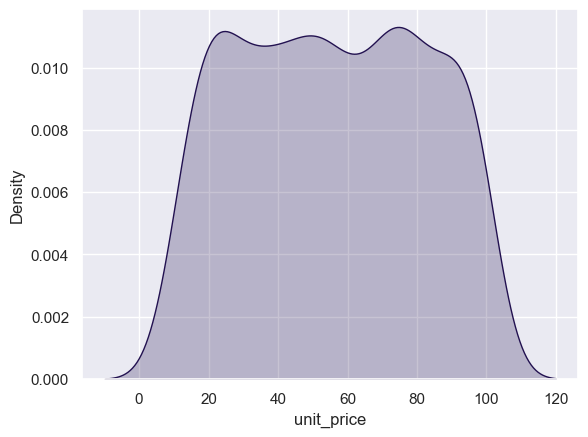

In [27]:
sns.kdeplot(df['unit_price'],fill=True)

Kernal Density Estimation (bivariate)

<Axes: xlabel='unit_price', ylabel='gross_income'>

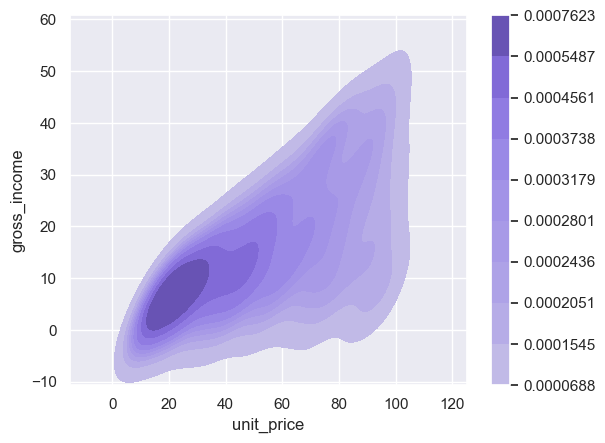

In [28]:
sns.kdeplot(data=df,x='unit_price', y='gross_income',fill=True,cbar=True,)